<a href="https://colab.research.google.com/github/neelsoumya/python_machine_learning/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODULE 4: FEATURE SELECTION METHODS

1. CREATING SAMPLE DATASET
----------------------------------------
Dataset Shape: (1000, 21)
Features: 20
Samples: 1000

Feature Categories:
- Important features (5): High correlation with target
- Moderate features (5): Moderate correlation with target
- Noise features (10): No correlation with target

First 5 rows:
   important_0  important_1  important_2  important_3  important_4  \
0     0.496714    -0.138264     0.647689     1.523030    -0.234153   
1    -0.234137     1.579213     0.767435    -0.469474     0.542560   
2    -0.463418    -0.465730     0.241962    -1.913280    -1.724918   
3    -0.562288    -1.012831     0.314247    -0.908024    -1.412304   
4     1.465649    -0.225776     0.067528    -1.424748    -0.544383   

   moderate_0  moderate_1  moderate_2  moderate_3  moderate_4  ...   noise_1  \
0   -1.114081   -0.630931   -0.942060   -0.547996   -0.214150  ...  0.432850   
1    0.837154   -0.321159   -1.585626    1.140068   -0.837090 

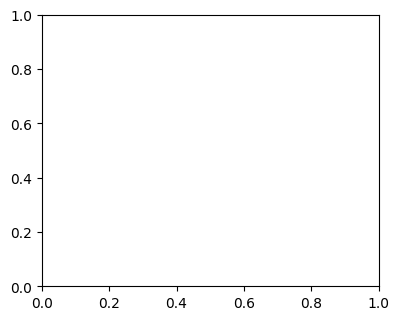

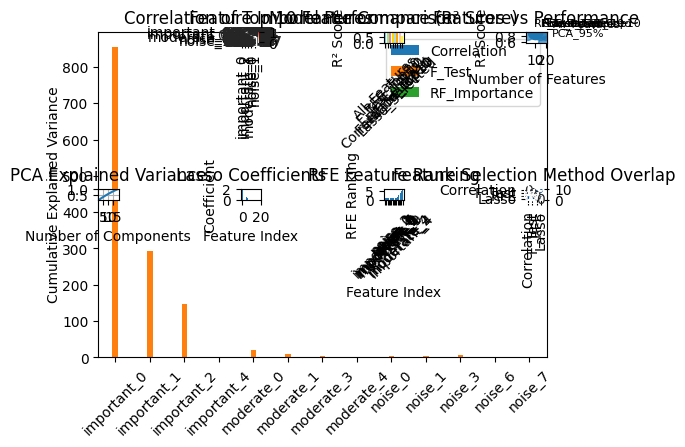


8. BUSINESS APPLICATIONS
----------------------------------------

Real-world Applications of Feature Selection:

1. **Financial Services**:
   - Credit scoring: Select most predictive features from hundreds of variables
   - Fraud detection: Identify key transaction patterns
   - Portfolio optimization: Choose relevant market indicators

2. **Healthcare**:
   - Disease diagnosis: Select relevant biomarkers from lab tests
   - Drug discovery: Identify important molecular features
   - Patient risk assessment: Choose predictive health indicators

3. **E-commerce**:
   - Customer churn prediction: Select behavioral features
   - Product recommendation: Choose relevant user preferences
   - Price optimization: Identify key demand drivers

4. **Manufacturing**:
   - Quality control: Select relevant sensor measurements
   - Predictive maintenance: Choose equipment health indicators
   - Process optimization: Identify key control variables

5. **Marketing**:
   - Campaign targeting: Select 

In [2]:
"""
Module 4: Feature Selection Methods
Level 7 Postgraduate Course

This module covers various feature selection techniques including filter methods,
wrapper methods, embedded methods, and dimensionality reduction techniques.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_classif
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

print("=" * 60)
print("MODULE 4: FEATURE SELECTION METHODS")
print("=" * 60)

# 1. Creating Sample Dataset
print("\n1. CREATING SAMPLE DATASET")
print("-" * 40)

# Generate synthetic dataset with many features
n_samples = 1000
n_features = 20

# Create features with different levels of importance
np.random.seed(42)

# Important features (high correlation with target)
important_features = np.random.normal(0, 1, (n_samples, 5))
target = (important_features[:, 0] * 2 +
          important_features[:, 1] * 1.5 +
          important_features[:, 2] * 1.0 +
          np.random.normal(0, 0.5, n_samples))

# Less important features (moderate correlation)
moderate_features = np.random.normal(0, 1, (n_samples, 5))
target += moderate_features[:, 0] * 0.5 + moderate_features[:, 1] * 0.3

# Noise features (no correlation with target)
noise_features = np.random.normal(0, 1, (n_samples, 10))

# Combine all features
X = np.hstack([important_features, moderate_features, noise_features])

# Create feature names
feature_names = ([f'important_{i}' for i in range(5)] +
                [f'moderate_{i}' for i in range(5)] +
                [f'noise_{i}' for i in range(10)])

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = target

print("Dataset Shape:", df.shape)
print(f"Features: {len(feature_names)}")
print(f"Samples: {n_samples}")

print("\nFeature Categories:")
print("- Important features (5): High correlation with target")
print("- Moderate features (5): Moderate correlation with target")
print("- Noise features (10): No correlation with target")

print("\nFirst 5 rows:")
print(df.head())

# 2. Filter Methods
print("\n2. FILTER METHODS")
print("-" * 40)

# Prepare data
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.1 Correlation-based selection
print("\n2.1 CORRELATION-BASED SELECTION")
print("-" * 30)

# Calculate correlation with target
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print("Top 10 features by correlation:")
print(correlations.head(10))

# Select top k features
k = 10
top_corr_features = correlations.head(k).index.tolist()
print(f"\nSelected {k} features based on correlation:")
print(top_corr_features)

# 2.2 Statistical tests
print("\n2.2 STATISTICAL TESTS")
print("-" * 30)

# F-test for regression
f_scores, p_values = f_regression(X_train, y_train)
f_test_scores = pd.Series(f_scores, index=X_train.columns).sort_values(ascending=False)

print("Top 10 features by F-test:")
print(f_test_scores.head(10))

# Mutual information
mi_scores = mutual_info_classif(X_train, (y_train > y_train.median()).astype(int), random_state=42)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("\nTop 10 features by Mutual Information:")
print(mi_scores_series.head(10))

# 2.3 SelectKBest
print("\n2.3 SELECTKBEST")
print("-" * 30)

# Use F-test with SelectKBest
selector_f = SelectKBest(score_func=f_regression, k=k)
X_train_f_selected = selector_f.fit_transform(X_train, y_train)
X_test_f_selected = selector_f.transform(X_test)

selected_features_f = X_train.columns[selector_f.get_support()].tolist()
print(f"Features selected by F-test (SelectKBest):")
print(selected_features_f)

# 3. Wrapper Methods
print("\n3. WRAPPER METHODS")
print("-" * 40)

# 3.1 Recursive Feature Elimination (RFE)
print("\n3.1 RECURSIVE FEATURE ELIMINATION")
print("-" * 40)

# Use Random Forest for RFE
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=rf, n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)

rfe_features = X_train.columns[rfe.support_].tolist()
print(f"Features selected by RFE:")
print(rfe_features)

print(f"\nRFE ranking (1 = selected, higher = eliminated):")
ranking_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': rfe.ranking_
}).sort_values('Ranking')
print(ranking_df.head(15))

# 3.2 Forward Selection (simplified)
print("\n3.2 FORWARD SELECTION (SIMPLIFIED)")
print("-" * 40)

def forward_selection(X, y, k):
    """Simple forward selection implementation"""
    selected_features = []
    remaining_features = list(X.columns)

    for i in range(k):
        best_score = -np.inf
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_subset = X[current_features]

            # Use cross-validation score
            scores = cross_val_score(rf, X_subset, y, cv=3, scoring='r2')
            mean_score = scores.mean()

            if mean_score > best_score:
                best_score = mean_score
                best_feature = feature

        if best_feature:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)

    return selected_features

# Run forward selection
forward_features = forward_selection(X_train, y_train, k)
print(f"Features selected by Forward Selection:")
print(forward_features)

# 4. Embedded Methods
print("\n4. EMBEDDED METHODS")
print("-" * 40)

# 4.1 Lasso Regression
print("\n4.1 LASSO REGRESSION")
print("-" * 30)

# Scale features for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit Lasso
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Get non-zero coefficients
lasso_features = X_train.columns[lasso.coef_ != 0].tolist()
print(f"Features selected by Lasso (non-zero coefficients):")
print(lasso_features)

print(f"\nLasso coefficients:")
lasso_coefs = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lasso.coef_
}).sort_values('Coefficient', key=abs, ascending=False)
print(lasso_coefs.head(10))

# 4.2 Random Forest Feature Importance
print("\n4.2 RANDOM FOREST FEATURE IMPORTANCE")
print("-" * 40)

# Fit Random Forest
rf_importance = RandomForestRegressor(n_estimators=100, random_state=42)
rf_importance.fit(X_train, y_train)

# Get feature importance
importance_scores = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 features by Random Forest importance:")
print(importance_scores.head(10))

# 4.3 SelectFromModel
print("\n4.3 SELECTFROMMODEL")
print("-" * 30)

# Use Random Forest with SelectFromModel
selector_rf = SelectFromModel(rf_importance, prefit=True)
rf_selected_features = X_train.columns[selector_rf.get_support()].tolist()

print(f"Features selected by SelectFromModel (Random Forest):")
print(rf_selected_features)

# 5. Dimensionality Reduction
print("\n5. DIMENSIONALITY REDUCTION")
print("-" * 40)

# 5.1 Principal Component Analysis (PCA)
print("\n5.1 PRINCIPAL COMPONENT ANALYSIS")
print("-" * 40)

# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Original features: {X_train.shape[1]}")
print(f"PCA components (95% variance): {X_train_pca.shape[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum():.4f}")

print("\nExplained variance by component:")
for i, var in enumerate(pca.explained_variance_ratio_[:10]):
    print(f"PC{i+1}: {var:.4f}")

# 5.2 Feature Agglomeration (simplified)
print("\n5.2 FEATURE CLUSTERING (SIMPLIFIED)")
print("-" * 40)

# Simple feature clustering based on correlation
correlation_matrix = X_train.corr().abs()
np.fill_diagonal(correlation_matrix.values, 0)

# Find highly correlated features
high_corr_threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > high_corr_threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"Highly correlated feature pairs (correlation > {high_corr_threshold}):")
for pair in high_corr_pairs[:10]:  # Show first 10
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# 6. Model Performance Comparison
print("\n6. MODEL PERFORMANCE COMPARISON")
print("-" * 40)

# Define feature selection methods
selection_methods = {
    'All_Features': X_train.columns.tolist(),
    'Correlation_Top10': top_corr_features,
    'F_Test_Top10': selected_features_f,
    'RFE_Top10': rfe_features,
    'Forward_Top10': forward_features,
    'Lasso_Selected': lasso_features,
    'RF_Selected': rf_selected_features,
    'PCA_95%': list(range(X_train_pca.shape[1]))  # PCA components
}

results = {}

for method_name, features in selection_methods.items():
    if method_name == 'PCA_95%':
        # Use PCA transformed data
        X_train_sel = X_train_pca
        X_test_sel = X_test_pca
    else:
        # Use selected features
        X_train_sel = X_train[features]
        X_test_sel = X_test[features]

    # Train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_sel, y_train)

    # Predictions
    y_pred = model.predict(X_test_sel)

    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_sel, y_train, cv=5, scoring='r2')

    results[method_name] = {
        'n_features': len(features) if method_name != 'PCA_95%' else X_train_pca.shape[1],
        'MSE': mse,
        'R²': r2,
        'CV_R²_Mean': cv_scores.mean(),
        'CV_R²_Std': cv_scores.std()
    }

print("Model Performance Comparison:")
print(f"{'Method':<20} {'Features':<10} {'MSE':<10} {'R²':<10} {'CV_R²':<15}")
print("-" * 70)
for method, metrics in results.items():
    print(f"{method:<20} {metrics['n_features']:<10} {metrics['MSE']:<10.4f} "
          f"{metrics['R²']:<10.4f} {metrics['CV_R²_Mean']:<10.4f} (+/- {metrics['CV_R²_Std']*2:.4f})")

# 7. Visualization
print("\n7. VISUALIZATION")
print("-" * 40)

plt.figure(figsize=(20, 12))

# Feature importance comparison
plt.subplot(3, 4, 1)
importance_comparison = pd.DataFrame({
    'Correlation': correlations.head(10),
    'F_Test': f_test_scores.head(10),
    'RF_Importance': importance_scores.set_index('Feature')['Importance'].head(10)
})
importance_comparison.plot(kind='bar')
plt.title('Feature Importance Comparison')
plt.xticks(rotation=45)

# Correlation heatmap of selected features
plt.subplot(3, 4, 2)
selected_corr = X_train[top_corr_features].corr()
sns.heatmap(selected_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of Top 10 Features')

# Model performance comparison
plt.subplot(3, 4, 3)
methods = list(results.keys())
r2_scores = [results[method]['R²'] for method in methods]
plt.bar(methods, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral', 'gold',
                                  'lightblue', 'orange', 'pink', 'yellow'])
plt.title('Model Performance (R² Score)')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

# Number of features vs performance
plt.subplot(3, 4, 4)
n_features = [results[method]['n_features'] for method in methods]
plt.scatter(n_features, r2_scores, s=100, alpha=0.7)
for i, method in enumerate(methods):
    plt.annotate(method, (n_features[i], r2_scores[i]), xytext=(5, 5),
                textcoords='offset points', fontsize=8)
plt.xlabel('Number of Features')
plt.ylabel('R² Score')
plt.title('Features vs Performance')

# PCA explained variance
plt.subplot(3, 4, 5)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)

# Lasso coefficients
plt.subplot(3, 4, 6)
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient')
plt.title('Lasso Coefficients')

# RFE ranking
plt.subplot(3, 4, 7)
ranking_df_plot = ranking_df.head(15)
plt.bar(range(len(ranking_df_plot)), ranking_df_plot['Ranking'])
plt.xlabel('Feature Index')
plt.ylabel('RFE Ranking')
plt.title('RFE Feature Ranking')
plt.xticks(range(len(ranking_df_plot)), ranking_df_plot['Feature'], rotation=45)

# Feature selection overlap
plt.subplot(3, 4, 8)
selection_sets = {
    'Correlation': set(top_corr_features),
    'F_Test': set(selected_features_f),
    'RFE': set(rfe_features),
    'Lasso': set(lasso_features)
}

# Create overlap matrix
overlap_matrix = np.zeros((len(selection_sets), len(selection_sets)))
methods_list = list(selection_sets.keys())

for i, method1 in enumerate(methods_list):
    for j, method2 in enumerate(methods_list):
        if i != j:
            overlap = len(selection_sets[method1] & selection_sets[method2])
            overlap_matrix[i, j] = overlap

sns.heatmap(overlap_matrix, annot=True, xticklabels=methods_list,
            yticklabels=methods_list, cmap='Blues')
plt.title('Feature Selection Method Overlap')

plt.tight_layout()
plt.show()

# 8. Business Applications
print("\n8. BUSINESS APPLICATIONS")
print("-" * 40)

print("""
Real-world Applications of Feature Selection:

1. **Financial Services**:
   - Credit scoring: Select most predictive features from hundreds of variables
   - Fraud detection: Identify key transaction patterns
   - Portfolio optimization: Choose relevant market indicators

2. **Healthcare**:
   - Disease diagnosis: Select relevant biomarkers from lab tests
   - Drug discovery: Identify important molecular features
   - Patient risk assessment: Choose predictive health indicators

3. **E-commerce**:
   - Customer churn prediction: Select behavioral features
   - Product recommendation: Choose relevant user preferences
   - Price optimization: Identify key demand drivers

4. **Manufacturing**:
   - Quality control: Select relevant sensor measurements
   - Predictive maintenance: Choose equipment health indicators
   - Process optimization: Identify key control variables

5. **Marketing**:
   - Campaign targeting: Select demographic and behavioral features
   - Conversion prediction: Choose relevant customer journey features
   - Customer lifetime value: Identify predictive purchase patterns
""")

print("\n" + "=" * 60)
print("END OF MODULE 4")
print("=" * 60)
